# Public Wifi Usage Analysis

## Import Library and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import data about public wifi usage 
df = pd.read_csv('CBRfree_Wi-Fi_Monthly_Reports NEW.csv', parse_dates=['Month'])

## Data Proprocessing

In [3]:
df.head()

,Month,Number of Unique Clients,Number of Sessions,Number of Unique Users,Number of Unique APs,Average Users per AP,Average Clients per AP,Client User Total Session Time (Hours),Average Session Time (Minutes),Average Session Time per User (Minutes),...,Total Sessions,Total Clients,Total Unique Users,Client Traffic Total Session Time (Hours),Average Traffic per Session (KB),Average Traffic per User (KB),Average Traffic per Client (KB),Average Throughput per Session (Kbps),Average Throughput per User (Kbps),Average Throughput per Client (Kbps)
0,Nov-14,16549,126388,16549,56,295.52,0.0,64327.88,30.54,233.23,...,126388,0,16549,64327.88,3100.45,23678.77,0.0,8.71,66.54,0.0
1,Dec-14,20097,123140,20097,91,220.85,0.0,55693.29,27.14,166.27,...,123140,0,20097,55693.29,1957.25,11992.65,0.0,6.07,37.18,0.0
2,Feb-15,21343,184401,21343,134,159.28,0.0,521269.83,169.61,1465.41,...,184401,0,21343,521269.83,3186.23,27528.62,0.0,16.08,138.96,0.0
3,Mar-15,20497,178032,20497,147,139.44,0.0,567704.57,191.33,1661.82,...,178032,0,20497,567704.57,3350.82,29104.42,0.0,15.91,138.18,0.0
4,Apr-15,22394,218742,22394,155,144.48,0.0,674175.54,184.92,1806.31,...,218742,0,22394,674175.54,7031.30,68680.92,0.0,52.85,516.20,0.0


In [4]:
# Given that client-related columns are duplicate to user-related columns, and client columns contain 0 values, 
# so we would remove columns contain client information by dropping all the list contain 'Client' regular expression. 

df.drop(list(df.filter(regex = 'Client')), axis = 1, inplace=True)
# Find duplicate rows and keep the first one. 
df.duplicated(subset=None, keep='first')
month=df['Month'].str.split('-', n=1, expand=True)
df['Month Name'] = month[0]
df['Year']=month[1]

## Exploratory Data Analysis 

### Distribution of Numerical Variables

In [5]:
def distribution (column):
    sns.set(style='whitegrid', palette='deep', font_scale=1.5, rc={'figure.figsize':[8, 6]})
    sns.distplot(df[column], norm_hist=False, kde=False, bins=12, hist_kws={'alpha':1}).set(xlabel=column, 
                                                                                            ylabel='Nr of Months', title= column + ' Distribution')

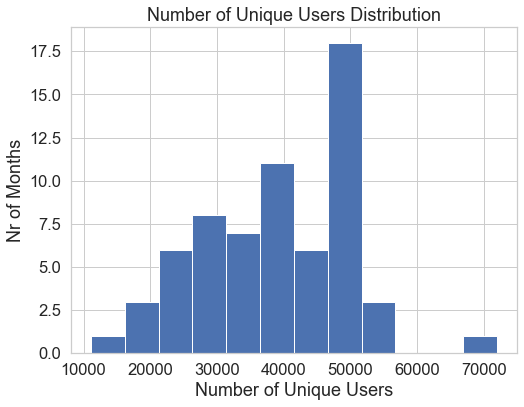

In [6]:
distribution('Number of Unique Users')

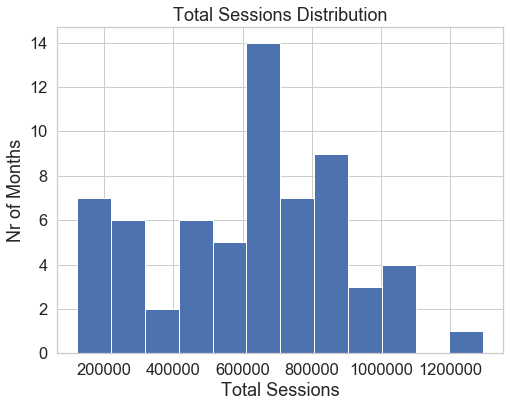

In [7]:
distribution('Total Sessions')

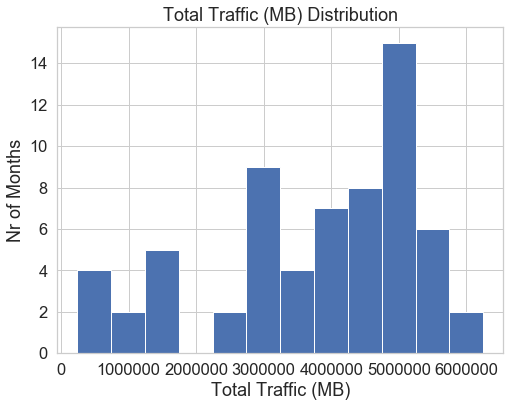

In [8]:
distribution('Total Traffic (MB)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CABBFC3348>,
      dtype=object)

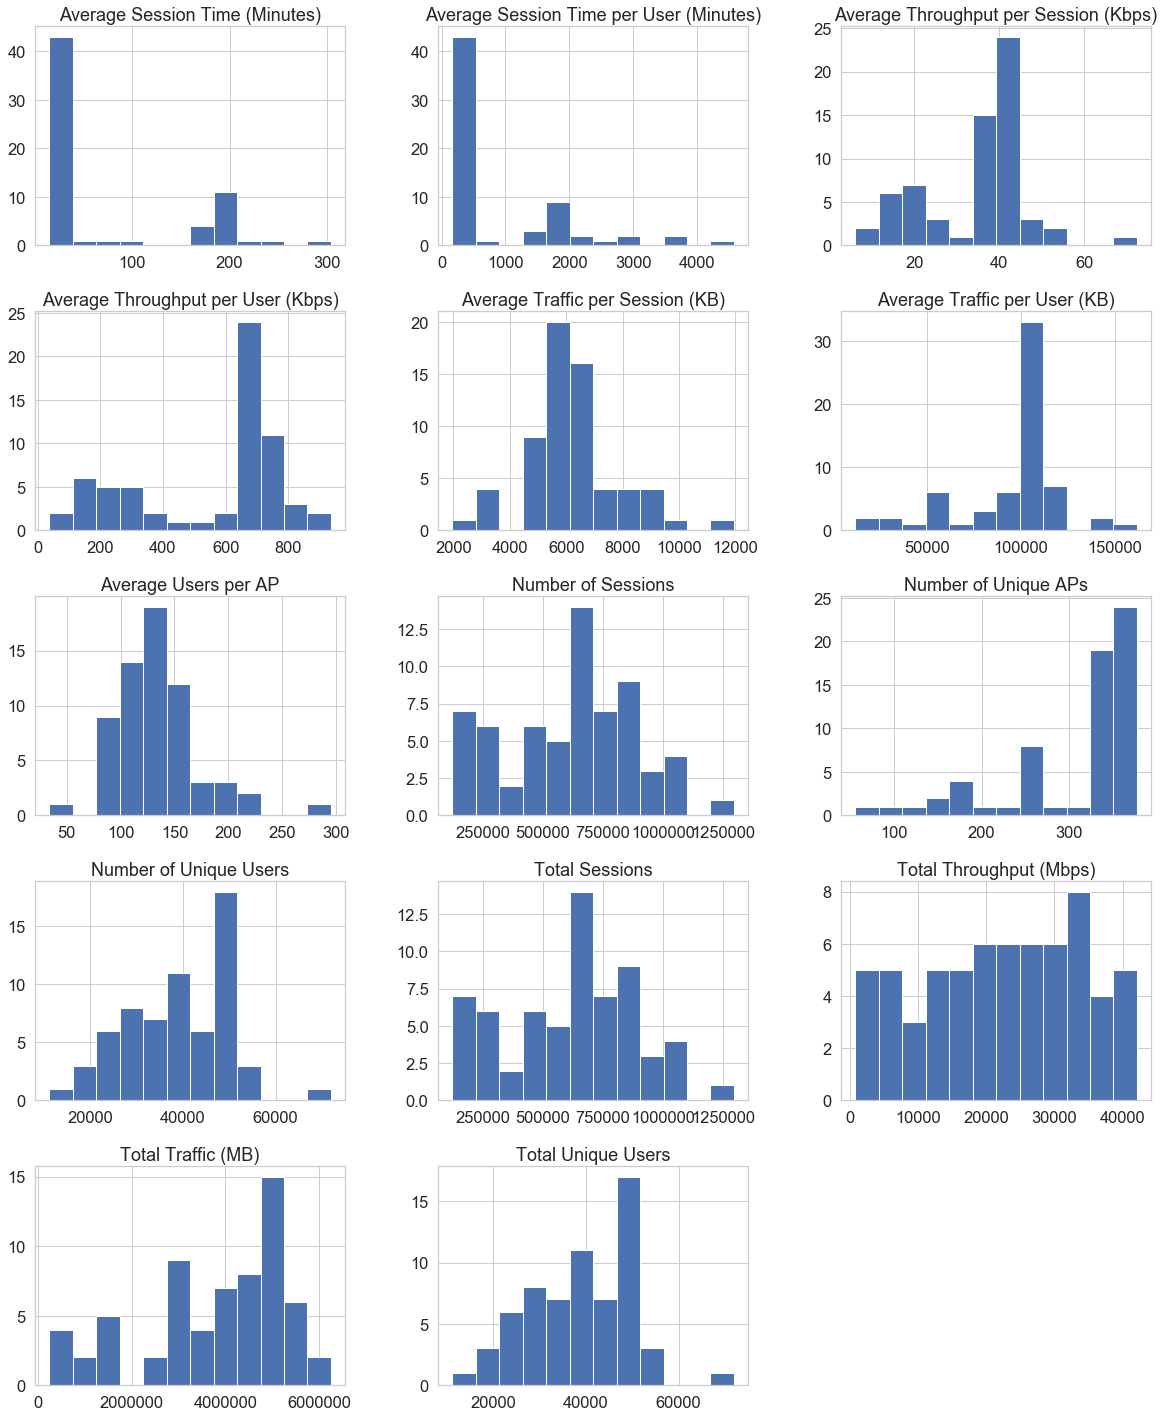

In [9]:
numerical = ['Number of Unique Users', 'Number of Sessions', 'Average Users per AP', 'Average Session Time (Minutes)', 
            'Average Traffic per Session (KB)', 'Total Traffic (MB)']
df.hist(bins=12, figsize=(20, 25), layout=(5, 3))

In [10]:
def Change(column):
    x = df['Month']
    y1 = df[column]
    plt.figure(figsize=(8, 6))
    plt.xticks(np.arange(0, 62, 5), rotation=45)
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title('Change in '+column)
    plt.plot(x, y1, linewidth= 2, linestyle='dashed', marker='o')
    #horizontal line represent average value in April
    h = df[df['Month Name']=='Apr'][column].mean()
    plt.axhline(h, color='red', linewidth=1, linestyle='dashed')
    plt.show()

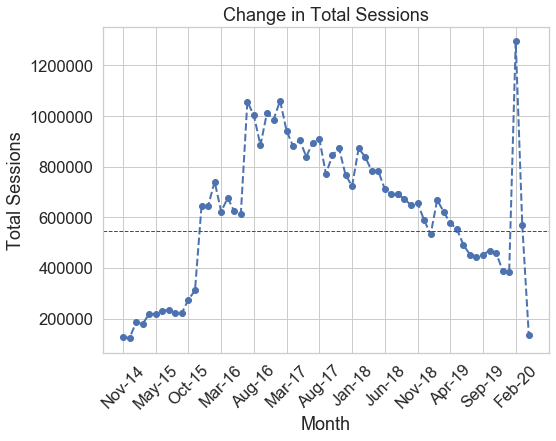

In [11]:
Change('Total Sessions')

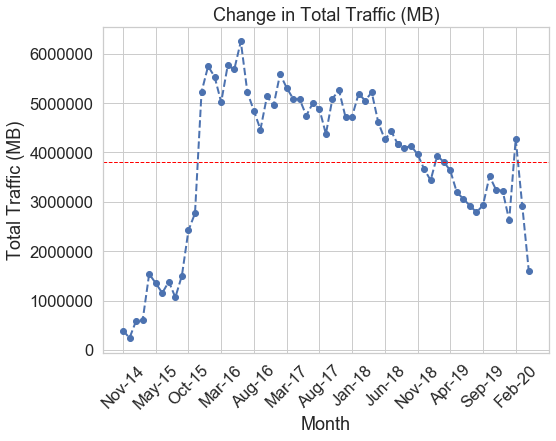

In [12]:
Change('Total Traffic (MB)')

### Relationship between Numberical Variables

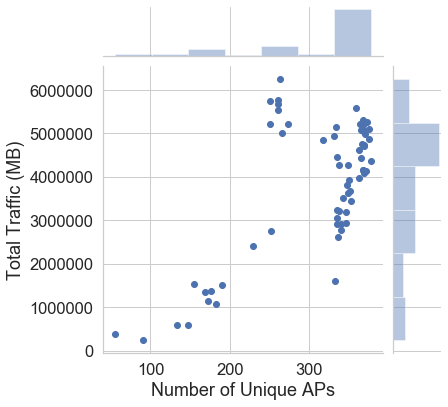

In [13]:
sns.jointplot(x=df['Number of Unique APs'], y=df['Total Traffic (MB)'])

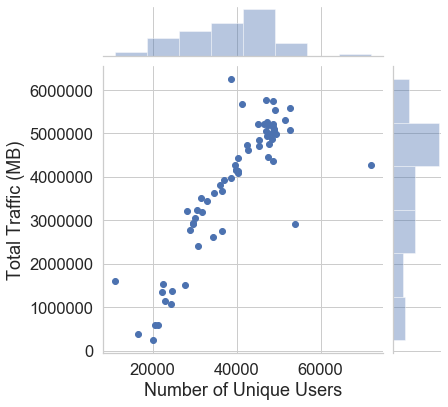

In [14]:
sns. jointplot(x=df['Number of Unique Users'], y=df['Total Traffic (MB)'])

### Relationships between Numerical and Categorical Variables

In [15]:
def Yearly_range(column):
    grouped_df = df.groupby('Year', as_index=False)['Total Sessions'].mean()
    grouped_df.head()
    plt.figure(figsize=(8, 6))
    x = df['Year']
    y =df[column]
    sns.set(style='whitegrid')
    sns.boxplot(x, y, data=df, palette='Blues')
    plt.title(column + ' Range')
    plt.show()

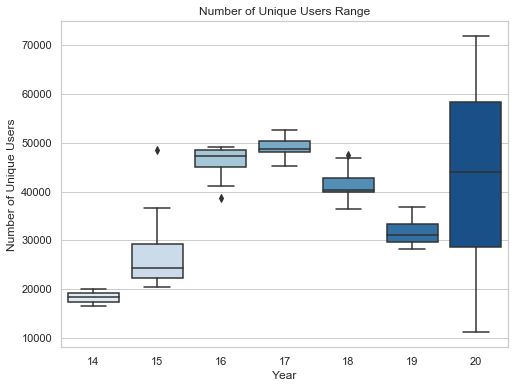

In [16]:
Yearly_range('Number of Unique Users')

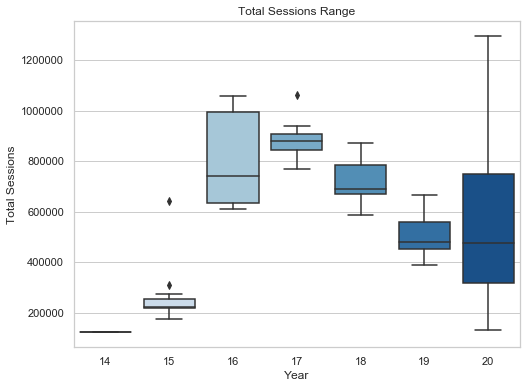

In [17]:
Yearly_range('Total Sessions')

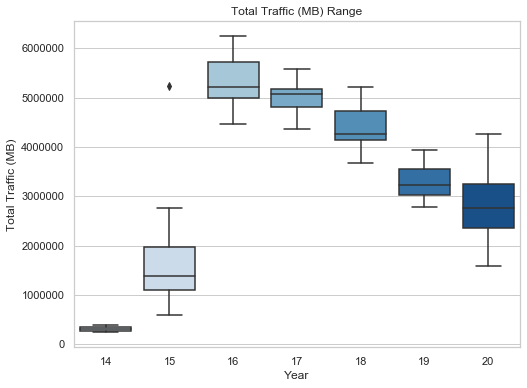

In [18]:
Yearly_range('Total Traffic (MB)')

### Correlation among Variables

In [19]:
df.corr()

,Number of Sessions,Number of Unique Users,Number of Unique APs,Average Users per AP,Average Session Time (Minutes),Average Session Time per User (Minutes),Total Traffic (MB),Total Throughput (Mbps),Total Sessions,Total Unique Users,Average Traffic per Session (KB),Average Traffic per User (KB),Average Throughput per Session (Kbps),Average Throughput per User (Kbps)
Number of Sessions,1.000000,0.912185,0.684608,0.066653,-0.401775,-0.183064,0.859364,0.847788,1.000000,0.915063,-0.147448,0.517158,0.193614,0.567927
Number of Unique Users,0.912185,1.000000,0.586577,0.231675,-0.201535,-0.012370,0.840104,0.637877,0.912207,0.999204,-0.061387,0.403955,-0.043767,0.274823
Number of Unique APs,0.684608,0.586577,1.000000,-0.587888,-0.631037,-0.436685,0.670405,0.793327,0.684589,0.592261,0.175056,0.679032,0.646187,0.794431
Average Users per AP,0.066653,0.231675,-0.587888,1.000000,0.357091,0.346698,0.006440,-0.281708,0.066694,0.224568,-0.341571,-0.415473,-0.787690,-0.620969
Average Session Time (Minutes),-0.401775,-0.201535,-0.631037,0.357091,1.000000,0.937478,-0.184433,-0.632633,-0.401750,-0.208291,0.292032,-0.203631,-0.570871,-0.696362
Average Session Time per User (Minutes),-0.183064,-0.012370,-0.436685,0.346698,0.937478,1.000000,0.074257,-0.444199,-0.183038,-0.019008,0.350770,0.036044,-0.489320,-0.533544
Total Traffic (MB),0.859364,0.840104,0.670405,0.006440,-0.184433,0.074257,1.000000,0.716304,0.859386,0.838496,0.280619,0.794602,0.182406,0.489168
Total Throughput (Mbps),0.847788,0.637877,0.793327,-0.281708,-0.632633,-0.444199,0.716304,1.000000,0.847766,0.644326,-0.149053,0.550760,0.579238,0.871927
Total Sessions,1.000000,0.912207,0.684589,0.066694,-0.401750,-0.183038,0.859386,0.847766,1.000000,0.915075,-0.147417,0.517178,0.193583,0.567897
Total Unique Users,0.915063,0.999204,0.592261,0.224568,-0.208291,-0.019008,0.838496,0.644326,0.915075,1.000000,-0.067375,0.401612,-0.037580,0.281562


In [20]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

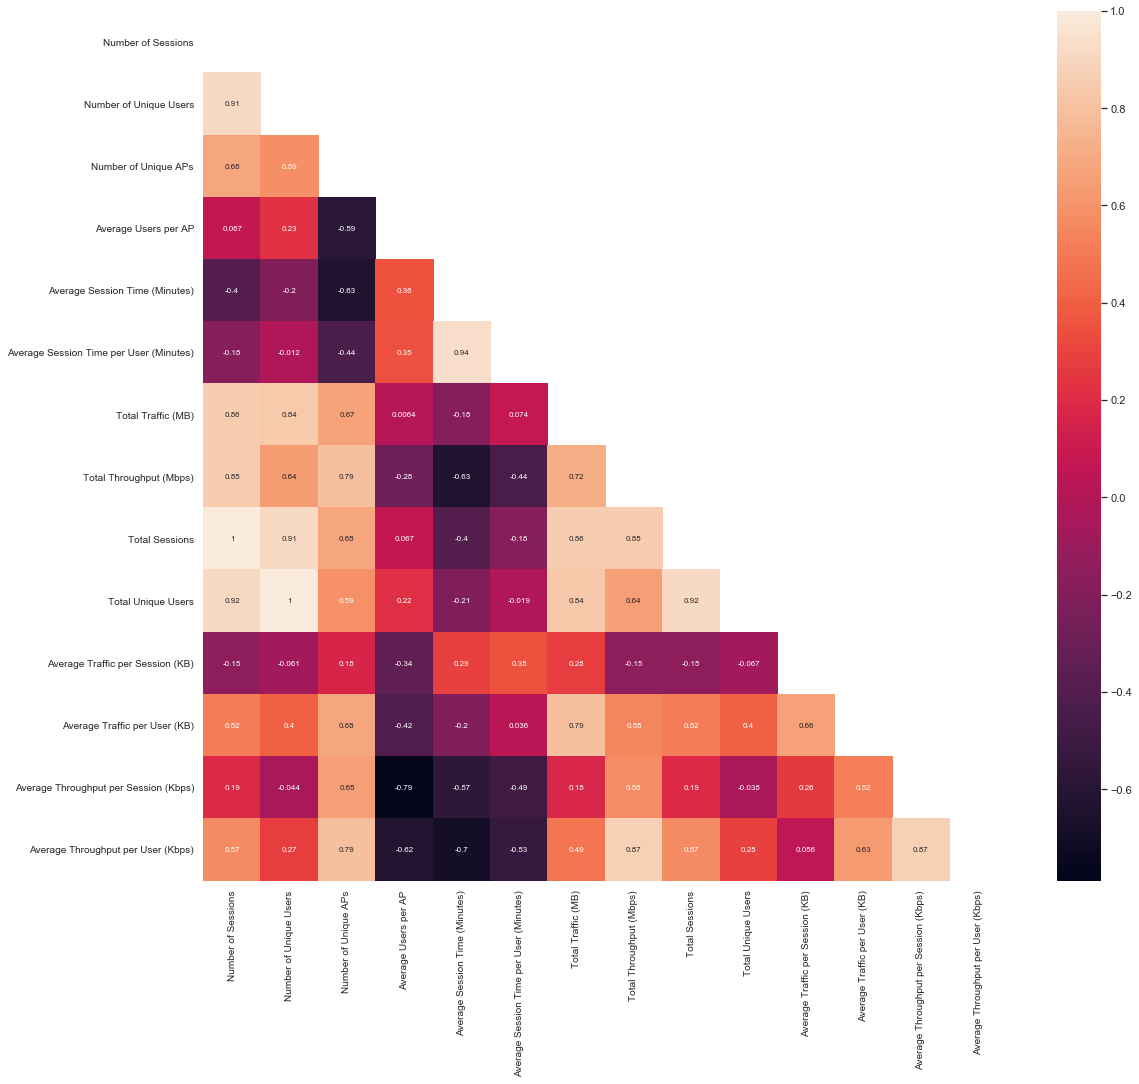

In [21]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 8})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()